In [75]:
import ticktack

import diagrams
from diagrams import Diagram, Edge, Cluster, Node
from diagrams.generic.place import Datacenter

In [2]:
cbm = ticktack.load_presaved_model('Guttler14')

In [3]:
def fix(name):
    return name.replace(' ','_').replace('&','').replace('-','_')

In [4]:
for box in cbm.get_nodes():
    print(fix(box))

Stratosphere
Troposphere
Surface_Water
Surface_Biota
Intermediate__Deep_water
Short_lived_biota
Long_lived_Biota
Litter
Soil
Peat
Sedimentary_Sink


In [19]:
atmosphere = ['Stratosphere','Troposphere']
ocean = ['Surface Water','Surface Biota', 'Intermediate & Deep water','Sedimentary Sink']
# other = ['Sedimentary_Sink']
land = ['Short lived biota','Long lived Biota','Litter','Soil','Peat']
clusters = [atmosphere,ocean,land]

In [20]:
# layouts = [circo dot fdp neato nop nop1 nop2 osage patchwork sfdp twopi]

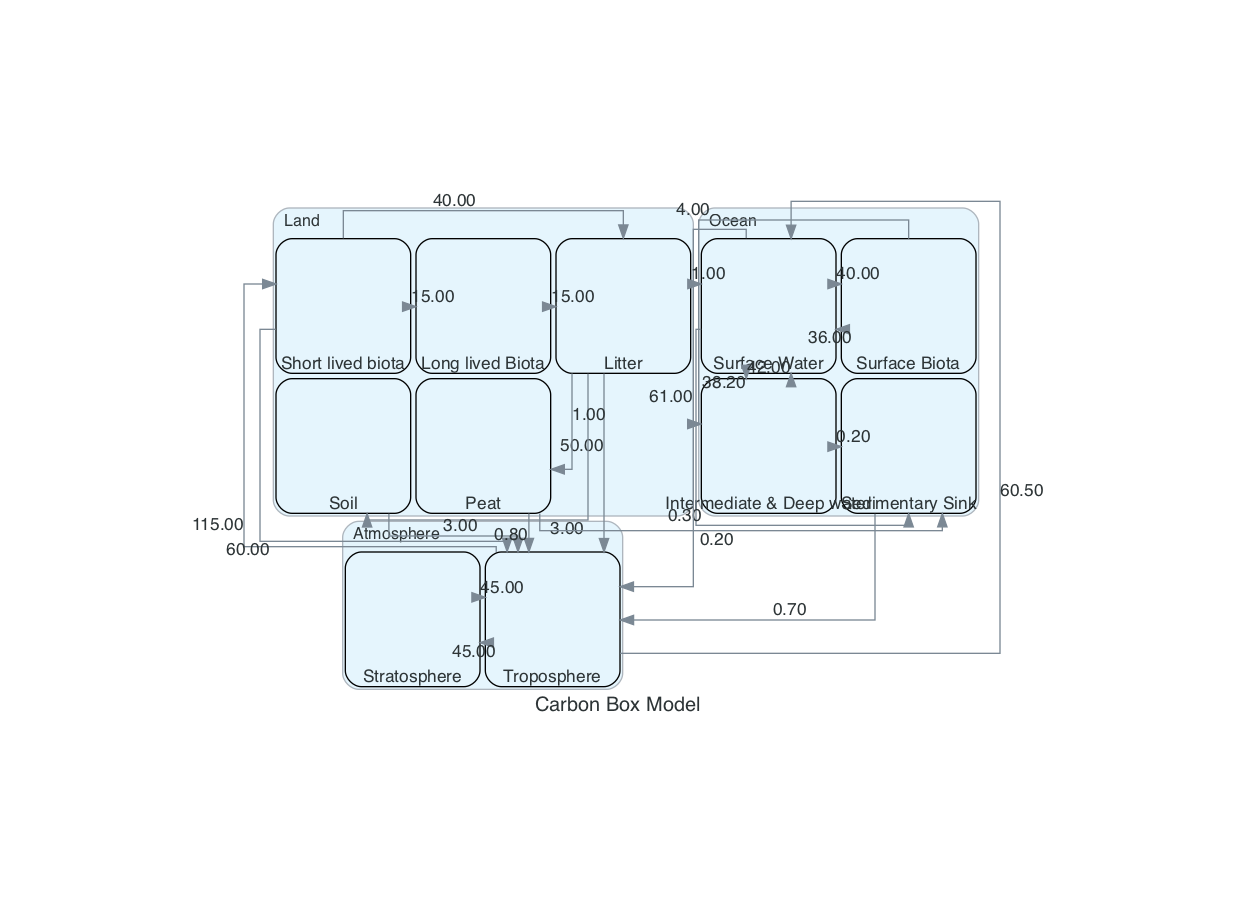

In [76]:
graph_attr = {
    "layout":"osage",
    "area":"25",
    "imagescale":"0.1"
#     "concentrate":"true",
#     "splines": "spline"
    }

node_attr = {'area':'2',
             'scale':"0.1"}
edge_attr = {'minlen':'2'}

with Diagram("Carbon Box Model",graph_attr=graph_attr,node_attr=node_attr,edge_attr=edge_attr) as diag:

    with Cluster('Ocean'):
        for name in ocean:
            exec('%s = Node(name)' % fix(name))
    with Cluster('Atmosphere'):
        for name in atmosphere:
            exec('%s = Node(name)' % fix(name))
    with Cluster('Land'):
        for name in land:
            exec('%s = Node(name)' % fix(name))

    for edge in cbm.get_edges_objects():
        e1, e2 = (edge.get_source()._name), (edge.get_destination()._name)
        exec('%s >> Edge(xlabel="%.2f") >> %s'  % (fix(e1), (edge.get_flux()), fix(e2)))
diag

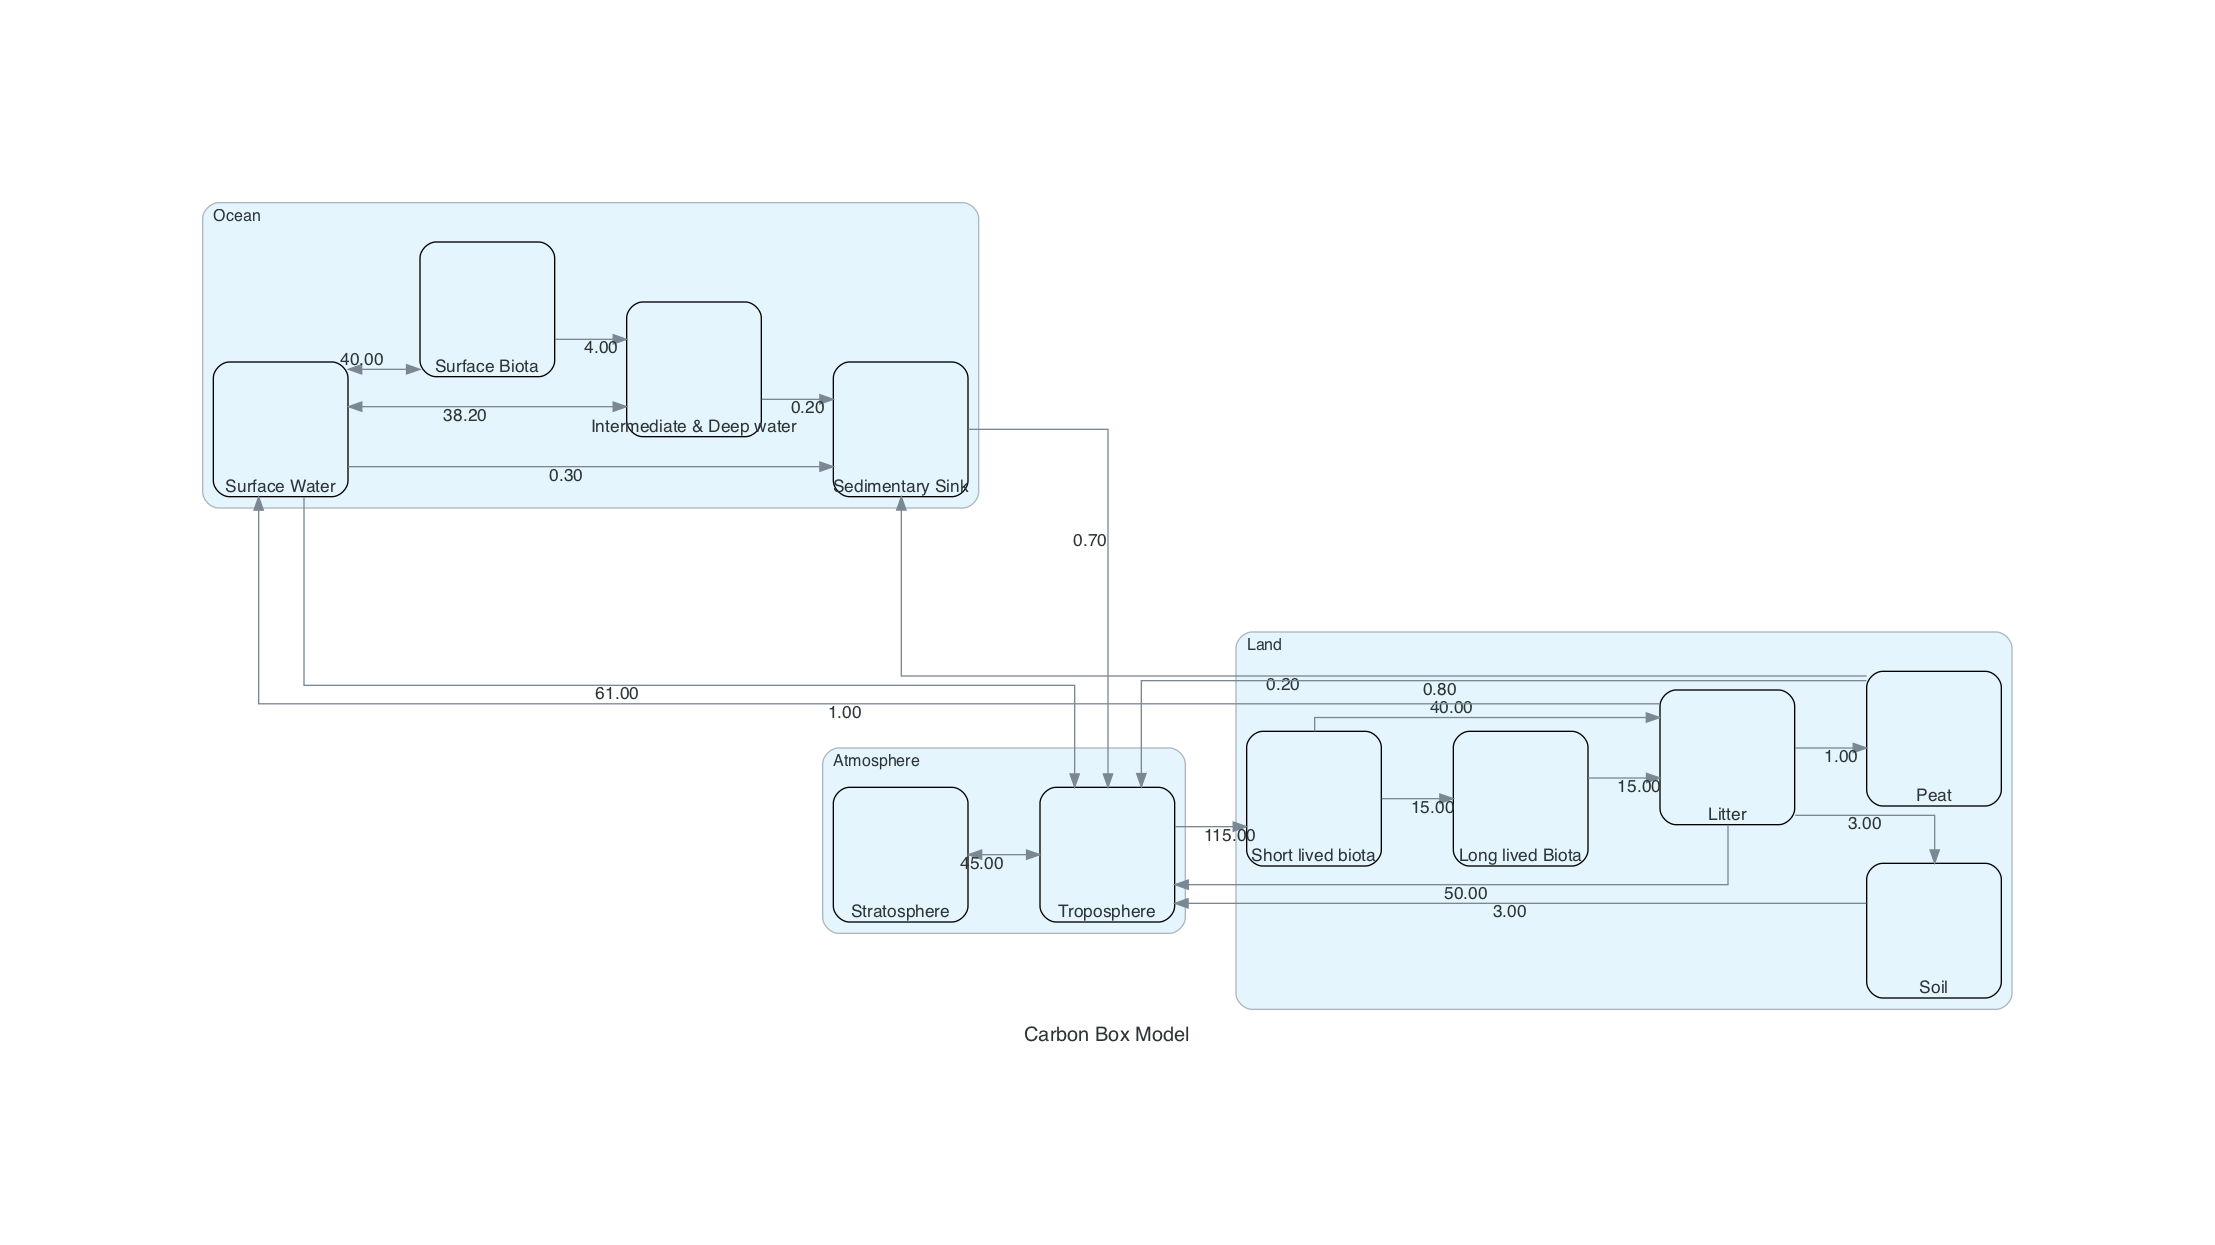

In [78]:
graph_attr = {
    "layout":"dot",
    'newrank':'true',
#     "area":"25",
#     "imagescale":"0.1"
    "concentrate":"true",
#     "splines": "spline"
    }

node_attr = {'area':'2',
             'scale':"0.1"}
edge_attr = {}

with Diagram("Carbon Box Model",graph_attr=graph_attr,node_attr=node_attr,edge_attr=edge_attr) as diag:

    with Cluster('Ocean'):
        for name in ocean:
            exec('%s = Node(name)' % fix(name))
    with Cluster('Atmosphere'):
        for name in atmosphere:
            exec('%s = Node(name)' % fix(name))
    with Cluster('Land'):
        for name in land:
            exec('%s = Node(name)' % fix(name))

    for edge in cbm.get_edges_objects():
        e1, e2 = (edge.get_source()._name), (edge.get_destination()._name)
        exec('%s >> Edge(xlabel="%.2f") >> %s'  % (fix(e1), (edge.get_flux()), fix(e2)))
diag

In [74]:
help(Diagram)

Help on class Diagram in module diagrams:

class Diagram(builtins.object)
 |  Diagram(name: str = '', filename: str = '', direction: str = 'LR', curvestyle: str = 'ortho', outformat: str = 'png', show: bool = True, graph_attr: dict = {}, node_attr: dict = {}, edge_attr: dict = {})
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, exc_type, exc_value, traceback)
 |  
 |  __init__(self, name: str = '', filename: str = '', direction: str = 'LR', curvestyle: str = 'ortho', outformat: str = 'png', show: bool = True, graph_attr: dict = {}, node_attr: dict = {}, edge_attr: dict = {})
 |      Diagram represents a global diagrams context.
 |      
 |      :param name: Diagram name. It will be used for output filename if the
 |          filename isn't given.
 |      :param filename: The output filename, without the extension (.png).
 |          If not given, it will be generated from the name.
 |      :param direction: Data flow direction. Default is 'left to right'